# Data Visualization with Matplotlib

This notebook aims to delve into the features and data within the Spotify dataset, utilizing the Python library Matplotlib for visualization.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## General Exploration

In [10]:
df = pd.read_csv('spotify_data.csv') 
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
n_tracks = len(df.track_id)
print(f'There are {n_tracks} tracks in this dataset')

## Data Visualization

Analyzing the distribution of select numerical features within the dataset. To achieve this, a histogram and a boxplot will be presented for each feature using a loop.

In [12]:
attributes = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
                'acousticness', 'liveness', 'tempo'] 

In [ ]:
for item in attributes:
 
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    
    axes[0].hist(df[item], bins=12, color='#79155B')

 
    axes[1].boxplot(df[item], vert=False, patch_artist=True, boxprops=dict(facecolor='#79155B'))


    plt.suptitle(f"Distribution Charts for the Column '{item}'", y=1.15, fontsize=15)
    axes[0].set_title(f"Histogram for {item}")
    axes[1].set_title(f"Boxplot for {item}")
   

    plt.grid(False) 
    plt.show() 

### Correlation Matrix

The correlation matrix illustrates the relationships among all numerical features within the dataset.

In [ ]:

correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))


heatmap = plt.pcolor(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)


plt.colorbar(heatmap)


plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)


plt.title('Correlation Matrix', fontsize=16, y=1.02)
plt.tight_layout()  

# Display the plot
plt.show()

### Top 30 Artists by Number of Tracks.

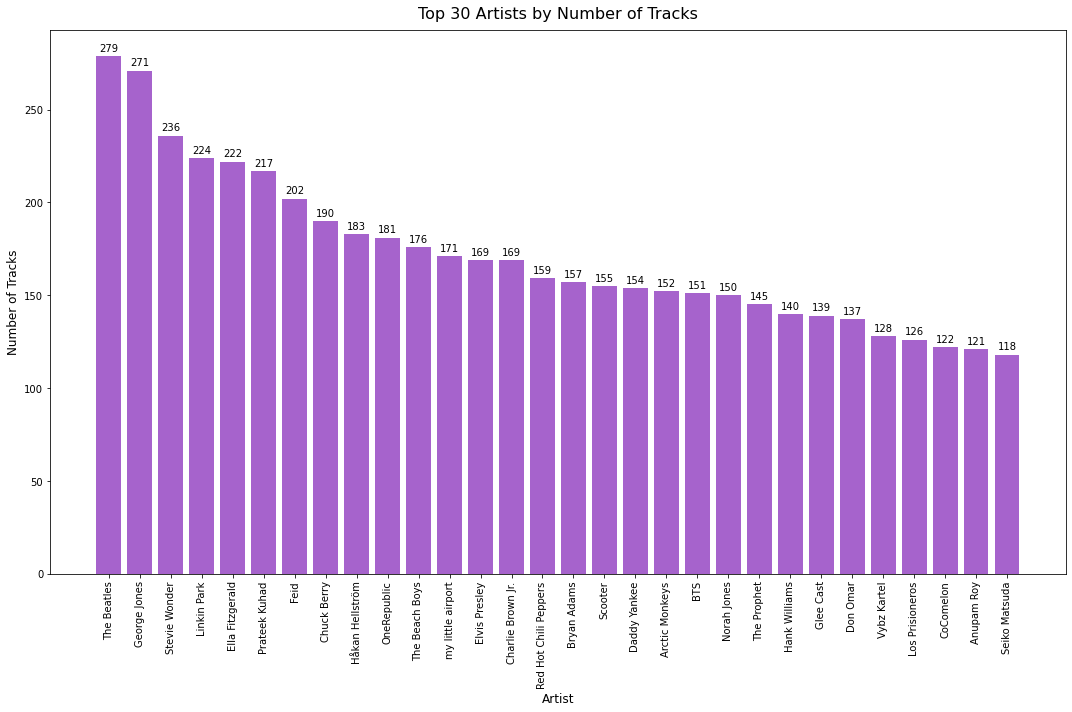

In [7]:

artist_track_counts = df.groupby('artists')['track_id'].count().sort_values(ascending=False).head(30)


fig, ax = plt.subplots(figsize=(15, 10))


bars = ax.bar(artist_track_counts.index, artist_track_counts.values, color='#a663cc')


for bar in bars:
    yval = bar.get_height()
    ax.annotate(f'{yval}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)


ax.set_ylabel('Number of Tracks', fontsize=12)
ax.set_xlabel('Artist', fontsize=12)
plt.xticks(rotation=90)


plt.title('Top 30 Artists by Number of Tracks', fontsize=16, y=1.01)
plt.tight_layout()  


plt.show()

### Number of albums by Artist - Top 30

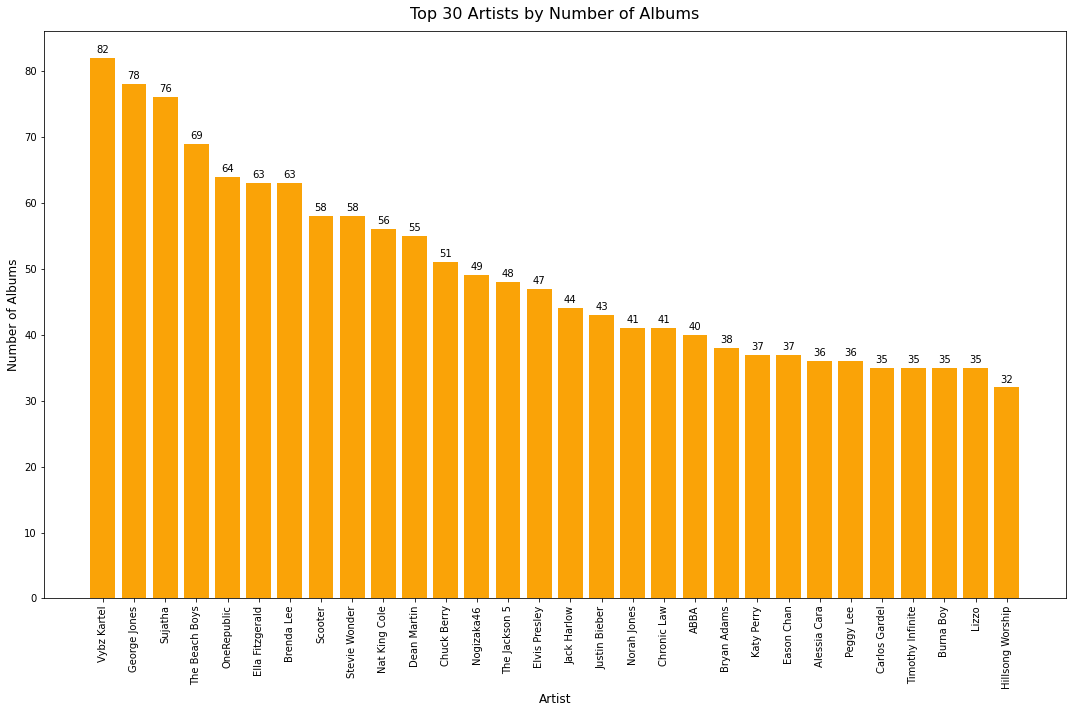

In [8]:

albums_by_artist = df.groupby(['artists'])['album_name'].nunique().sort_values(ascending=False).head(30)


fig, ax = plt.subplots(figsize=(15, 10))


bars = ax.bar(albums_by_artist.index, albums_by_artist.values, color='#faa307')


for bar in bars:
    yval = bar.get_height()
    ax.annotate(f'{yval}', xy=(bar.get_x() + bar.get_width() / 2, yval),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)


ax.set_ylabel('Number of Albums', fontsize=12)
ax.set_xlabel('Artist', fontsize=12)
plt.xticks(rotation=90)


plt.title('Top 30 Artists by Number of Albums', fontsize=16, y=1.01)
plt.tight_layout() 


plt.show()

### Top Genres by Average Track Popularity

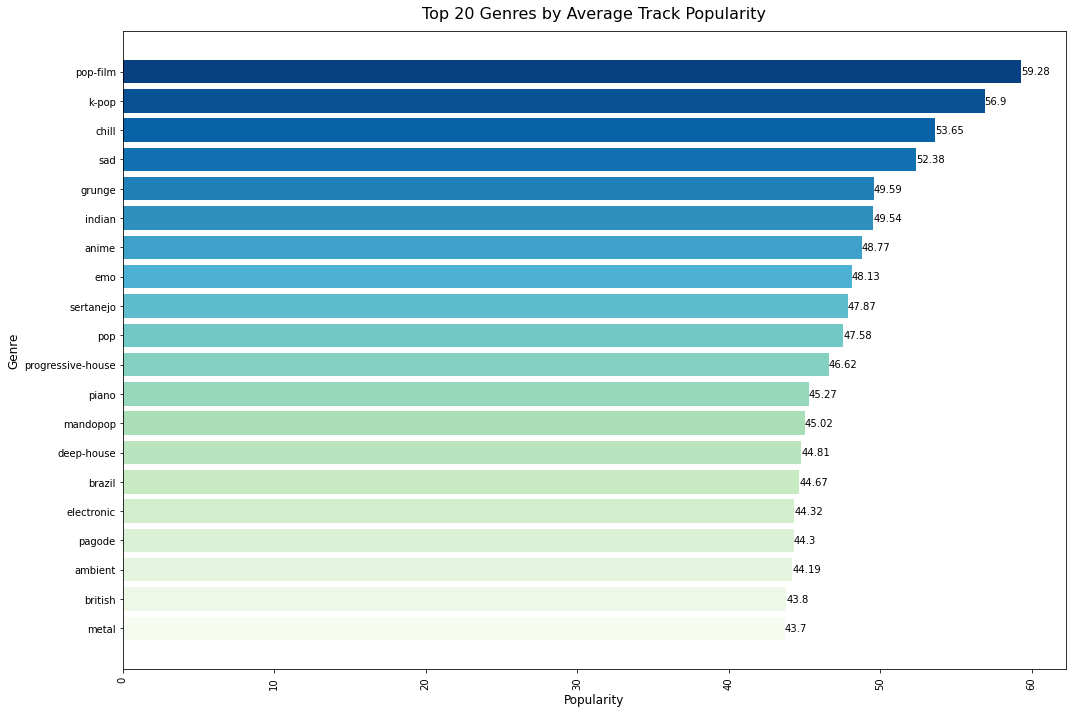

In [9]:

popularity_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(20).sort_values(ascending=True)


fig, ax = plt.subplots(figsize=(15, 10))


color_palette = cm.get_cmap('GnBu', len(popularity_by_genre))


bars = ax.barh(popularity_by_genre.index, popularity_by_genre.values, color=color_palette(range(len(popularity_by_genre))))


ax.set_ylabel('Genre', fontsize=12)
ax.set_xlabel('Popularity', fontsize=12)
plt.xticks(rotation=90)


plt.title('Top 20 Genres by Average Track Popularity', fontsize=16, y=1.01)
plt.tight_layout()


for index, value in enumerate(popularity_by_genre.values):
    ax.text(value, index, str(round(value, 2)), va='center', fontsize=10, color='black')


plt.show()

### Scatter Plot

Finally, we will generate a scatter plot to analyze the relationship between Loudness, Energy, and Acousticness.

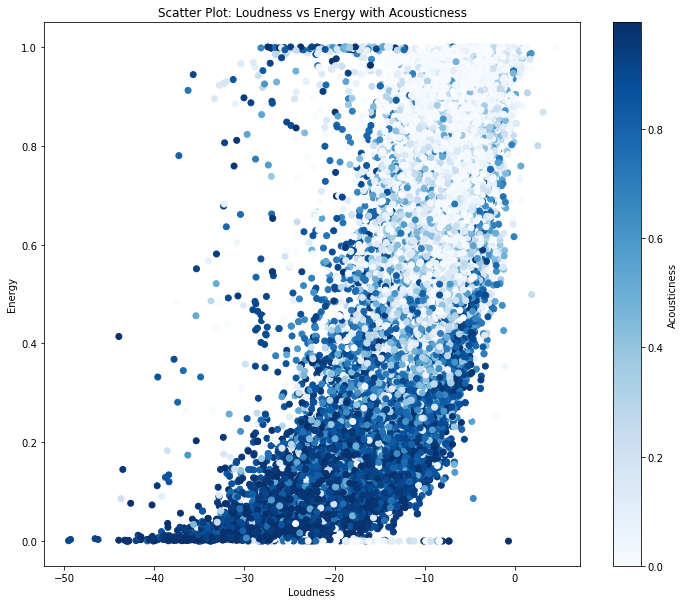

In [11]:

X = df['loudness']       
Y = df['energy']         
Z = df['acousticness']   


fig, ax = plt.subplots(figsize=(12, 10))


sc = ax.scatter(X, Y, c=Z, cmap=cm.Blues)


fig.colorbar(sc, ax=ax, label='Acousticness')


ax.set_xlabel('Loudness')  
ax.set_ylabel('Energy')    


ax.set_title('Scatter Plot: Loudness vs Energy with Acousticness')


plt.show()